In [26]:
#import dependencies
import matplotlib.pyplot as pt
import hvplot.pandas
import pandas as pd
import requests
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [29]:
# Load the track and field CSV file into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


In [30]:


 

olympic_track_data.head()


There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit the format
There was a time that didn't fit

TypeError: strptime() argument 1 must be str, not float

In [4]:
# Load the athlete events CSV file into a Pandas DataFrame
olympic_athletes_data = pd.read_csv("athlete_events.csv")

olympic_athletes_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# Load the NOC CSV file into a Pandas DataFrame
NOC_data = pd.read_csv("noc_regions.csv")

NOC_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [15]:
ten_thousand_m_df = olympic_track_data.loc[olympic_track_data['Event']=="10000M Men"]

ten_thousand_m_df.dtypes


Gender         object
Event          object
Location       object
Year            int64
Medal          object
Name           object
Nationality    object
Result         object
dtype: object

In [35]:
# Split the time strings into minutes, seconds, and hundredths

seconds_result = []
minutes = ""
seconds = ""

for result in ten_thousand_m_df['Result']:
    try:
        time = datetime.strptime(result,"%M:%S.%f")
    except ValueError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    minutes = time.minute
    seconds = time.second
    hundredths = time.microsecond
    total_seconds = minutes * 60 + seconds

    seconds_result.append(total_seconds)

ten_thousand_m_df['Time(s)']=seconds_result

ten_thousand_m_df.head()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time(s)
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17,1505
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64,1625
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26,1626
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17,1621
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77,1622


<Axes: title={'center': 'Medal Winning Times for Mens 10,000 meter'}, xlabel='Year of Olympics', ylabel='Time (seconds)'>

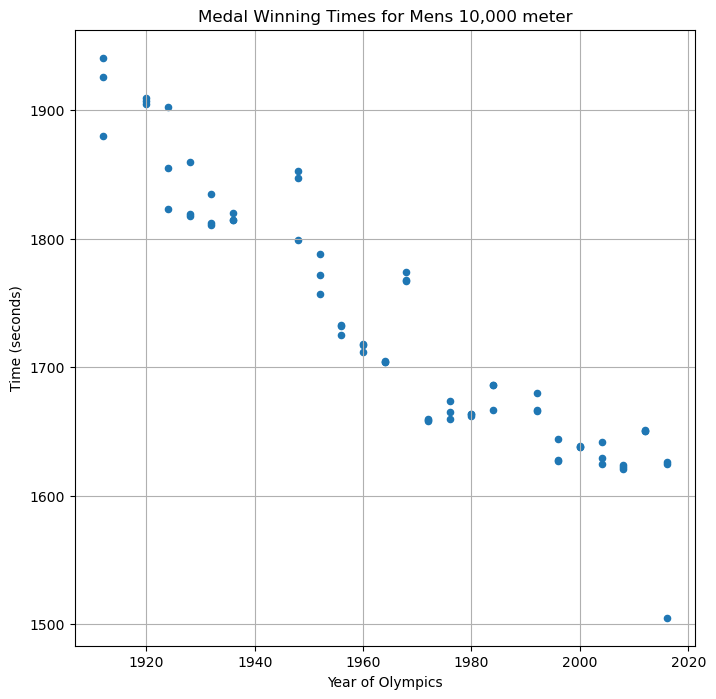

In [36]:
# Build scatter plot for Time result vs. Year of Olympics
ten_thousand_m_df.plot(kind="scatter", x="Year", y="Time(s)", grid=True, figsize=(8,8),
              title="Medal Winning Times for Mens 10,000 meter",xlabel = "Year of Olympics", ylabel = "Time (seconds)")


# Incorporate the other graph properties
# YOUR CODE HERE
